## StockX 2019 Data Challenge

This notebook contains my analysis + submission for [StockX's Data challenge](https://stockx.com/news/the-2019-data-contest/)! StockX is a marketplace for selling/buyer highly sought-after sneakers, and for this challenge they released a sample of actual transactional data on sneaker purchases for popular brands (Yeezy's and Off-whites for my sneaker heads out there). Their ask was simple: Take [this dataset](https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019-3.xlsx) and create an interesting visualization out of it. Oh, and the winner gets $1,000 in StockX credit. 

<br> 

[My final submission can be viewed here](https://www.youtube.com/watch?v=nDVz9fdRfzU&feature=youtu.be)! Oh and if i'm lucky enough to be selected as the winner, [these are the shoes](https://stockx.com/nike-air-max-97-off-white?gclid=EAIaIQobChMIrI_OhPbQ4AIVkLfACh2nmg8CEAQYASABEgLRtfD_BwE) I would buy!

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-white')

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

## Data Prep

CSV can be found [here](https://stockx.com/news/the-2019-data-contest/)

In [44]:
base = pd.read_csv('stockx_base.csv')

In [3]:
base.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [13]:
base = base.rename(columns={'Order Date':'order_date'
                    ,'Brand':'brand'
                    ,'Sneaker Name':'sneaker_name' 
                    ,'Sale Price': 'sale_price'
                    , 'Retail Price':'retail_price'
                    , 'Release Date':'release_date'
                    , 'Shoe Size': 'shoe_size'
                    , 'Buyer Region':'buyer_region'  })

In [14]:
# [DATETIME] column to datetime datatype
base.order_date = pd.to_datetime(base.order_date, utc=True).dt.tz_localize(None)
base.release_date = pd.to_datetime(base.release_date, utc=True).dt.tz_localize(None)

# Convert to int
base['sale_price'] = base['sale_price'].str[1:].astype(str).str.replace(',', '').astype(int)
base['retail_price'] = base['retail_price'].str[1:].astype(str).str.replace(',', '').astype(int)
base['p_of_retail'] = base['sale_price'] / base['retail_price']
base['price_diff'] = base['sale_price'] - base['retail_price']

base['days_after_release'] = base['order_date'] - base['release_date']
base['days_after_release'] = base['days_after_release'] / np.timedelta64(1,'D')
base['days_after_release'] = base['days_after_release'].astype(int)

In [6]:
base.head()

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,p_of_retail,price_diff,days_before_release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,4.986364,877,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,3.113636,465,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,3.136364,470,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,4.886364,855,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,3.763636,608,202


## Explorations

* Are there any regional differences in pricing, purchase volume, etc.? 
* How about Shoe size? 
* Plotting Average Price over order date 

What's actionable? For StockX? For buyer/sellers? 
* When's the best time to buy for a consumer / sell for a supplier? 
* When do most sales happen?

### Pricing by Days from Release Date

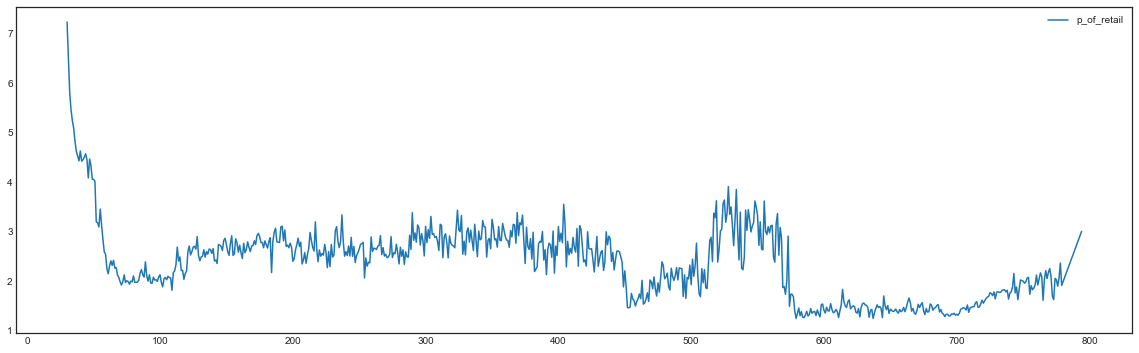

In [15]:
# Best time to buy? 
df_1 = base.groupby('days_after_release').agg({'p_of_retail':'mean', 'order_date':'count'}).reset_index().rename(columns={'order_date':'num_orders'})
df_1.set_index('days_after_release')
df_1 = df_1[df_1['num_orders']>10]
df_1.plot(y='p_of_retail', figsize=(20,6))

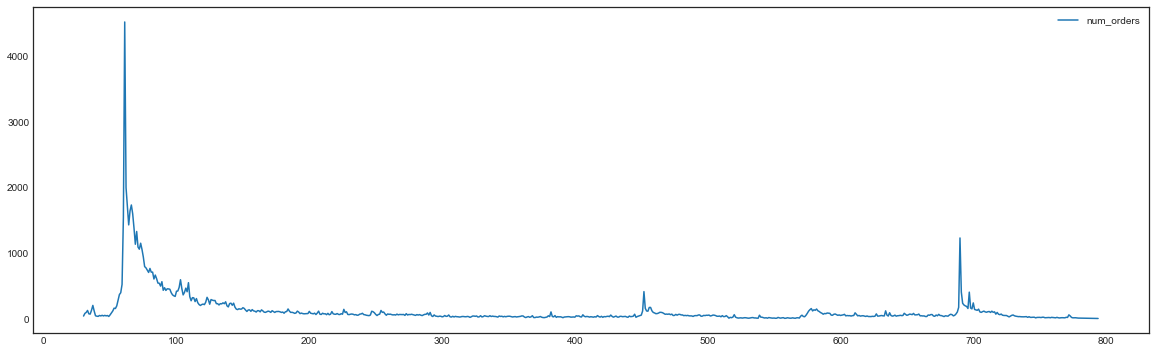

In [20]:
# Best time to buy? 
df_1 = base.groupby('days_after_release').agg({'p_of_retail':'mean', 'order_date':'count'}).reset_index().rename(columns={'order_date':'num_orders'})
df_1.set_index('days_after_release')
df_1 = df_1[df_1['num_orders']>10]
df_1.plot(y='num_orders', figsize=(20,6))

### Purchase volume, Days after release date 

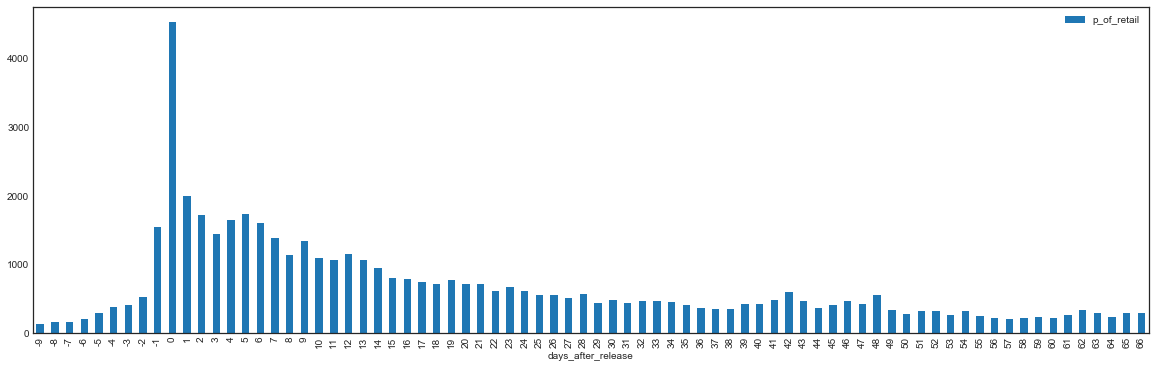

In [16]:
# Best time to buy? 
time = base[(base['days_after_release'] > -10) & (base['days_after_release'] < 67)]
time.groupby('days_after_release').agg({'p_of_retail':'count'}).plot(kind='bar', figsize=(20,6))

## When's the best time to buy?

Plotting Sales Price vs. Retail Price, by Days to Release 

In [22]:
time = base[(base['days_after_release'] > -10) & (base['days_after_release'] < 67)]
df_2 = time.groupby('days_after_release').agg({'p_of_retail':'mean','price_diff':'mean'}).reset_index()

In [23]:
# p100 = df_2.p_of_retail.max()
# p75  = np.percentile(df_2.p_of_retail, 75)
# p50  = np.percentile(df_2.p_of_retail, 50)
# p25  = np.percentile(df_2.p_of_retail, 25)
# p0   = df_2.p_of_retail.min()

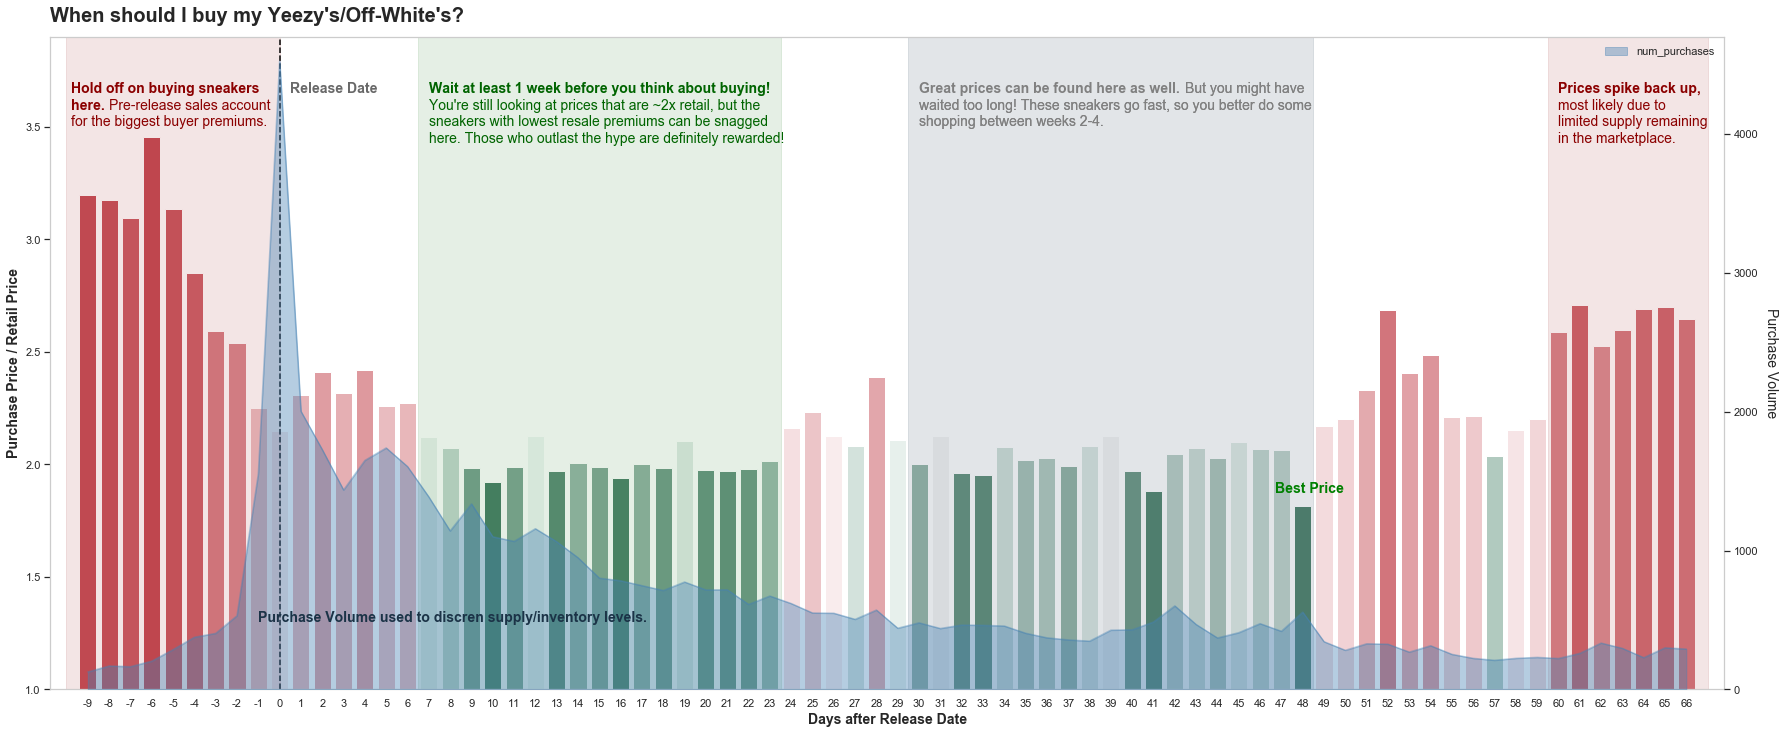

In [33]:
sns.set(style="whitegrid", color_codes=True)

data = df_2

pal = sns.diverging_palette(10, 150, n=len(data)) # Palette / Colormap creation (10 is green, 150 is red)
rank = data['p_of_retail'].argsort().argsort() # Ranks vals and assigns colors 

fig, ax = plt.subplots(figsize=(30,12))

# plt.subplots_adjust(left=0, right=0.1, top=0.9, bottom=0.1)

plt.margins(x=0.01)

sns.barplot(x=data['days_after_release'], y=data['p_of_retail'], palette=np.array(pal[::-1])[rank], ax=ax)
ax2 = ax.twinx()
time.groupby('days_after_release').agg({'p_of_retail':'count'}).reset_index().rename(columns={'p_of_retail':'num_purchases'}).plot(y='num_purchases'
                                                                                                                                    , kind='area'
                                                                                                                                    , ax=ax2
                                                                                                                                    , alpha=0.4
                                                                                                                                    , color='SteelBlue')

height = 3.65
space = .073

# Pre-release 
ax.axvspan(-1,9,color='DarkRed',alpha=.1) # Worst time to buy 
ax.text(-0.8, height,'Hold off on buying sneakers',fontsize='14',color='Darkred',fontweight='bold')
ax.text(-0.8, height-space,'here.',fontsize='14',color='Darkred',fontweight='bold')
ax.text(1.0, height-space,"""Pre-release sales account""",fontsize='14',color='Darkred')
ax.text(-0.8, height-space*2,"""for the biggest buyer premiums.""",fontsize='14',color='Darkred')

# Release Date
ax.axvline(9,color='Black',linestyle='--') # Release Date 
ax.text(9.5, height,'Release Date',fontsize='14', color='DimGray',fontweight='bold')

# Good time to buy
ax.axvspan(15.5,32.5,color='DarkGreen',alpha=.1) # Best time to buy 
ax.text(16, height,'Wait at least 1 week before you think about buying!',fontsize='14',color='DarkGreen',fontweight='bold')
ax.text(16, height-space,"""You're still looking at prices that are ~2x retail, but the""",fontsize='14',color='DarkGreen')
ax.text(16, height-space*2,"""sneakers with lowest resale premiums can be snagged""",fontsize='14',color='DarkGreen')
ax.text(16, height-space*3,'here. Those who outlast the hype are definitely rewarded!',fontsize='14',color='DarkGreen')
# ax.text(16.1, height-space*4,'',fontsize='14',color='DarkGreen')

# Even better time to buy - but you might've waited too long! 
ax.axvspan(38.5,57.5,color='SlateGrey',alpha=.2) 
ax.text(39, height,'Great prices can be found here as well.',fontsize='14',color='Grey',fontweight='bold')
ax.text(51.5, height,'But you might have',fontsize='14',color='Grey')
ax.text(39, height-space,"""waited too long! These sneakers go fast, so you better do some """,fontsize='14',color='Grey')
ax.text(39, height-space*2,"""shopping between weeks 2-4.""",fontsize='14',color='Grey')
ax.text(51.5, height,'But you might have',fontsize='14',color='Grey')
ax.text(39, height-space,"""waited too long! These sneakers go fast, so you better do some """,fontsize='14',color='Grey')
ax.text(39, height-space*2,"""shopping between weeks 2-4.""",fontsize='14',color='Grey')

# Late-Stage - Supply is likely limited, and sneakers are now going for a premium! 
ax.axvspan(68.5,76,color='DarkRed',alpha=.1) # Worst time to buy 
ax.text(69, height,'Prices spike back up, ',fontsize='14',color='Darkred',fontweight='bold')
ax.text(69, height-space,'most likely due to ',fontsize='14',color='Darkred')
ax.text(69, height-space*2,"""limited supply remaining """,fontsize='14',color='Darkred')
ax.text(69, height-space*3,"""in the marketplace.""",fontsize='14',color='Darkred')

#min 
ax.text(55.7, 1.875, """Best Price""",fontsize='14',color='Green',fontweight='bold')

ax.set_ylabel('Purchase Price / Retail Price', fontsize=14,fontweight='bold')
ax.set_xlabel('Days after Release Date', fontsize=14,fontweight='bold')
ax.set_title("""When should I buy my Yeezy's/Off-White's? """,fontsize=20,loc='left',fontweight='bold',pad=15)

ax2.set_ylabel('Purchase Volume', fontsize=14,labelpad=20).set_rotation(270)

ax.text(8, 1.3,"""Purchase Volume used to discren supply/inventory levels.""",fontsize='14',color='Black',fontweight='bold')


_ = ax.set_ylim([1.0, 3.9])
_ = ax2.set_ylim([0, 4700])

ax.grid(False)
ax2.grid(False)
plt.box(False)
plt.show()

## Animating the chart!

Note: I had some trouble using the FFMpeg writer. Run __`brew install ffmpeg`__ in terminal (if you have homebrew installed).


In [39]:
import matplotlib.animation as animation

writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1000)

<IPython.core.display.Javascript object>


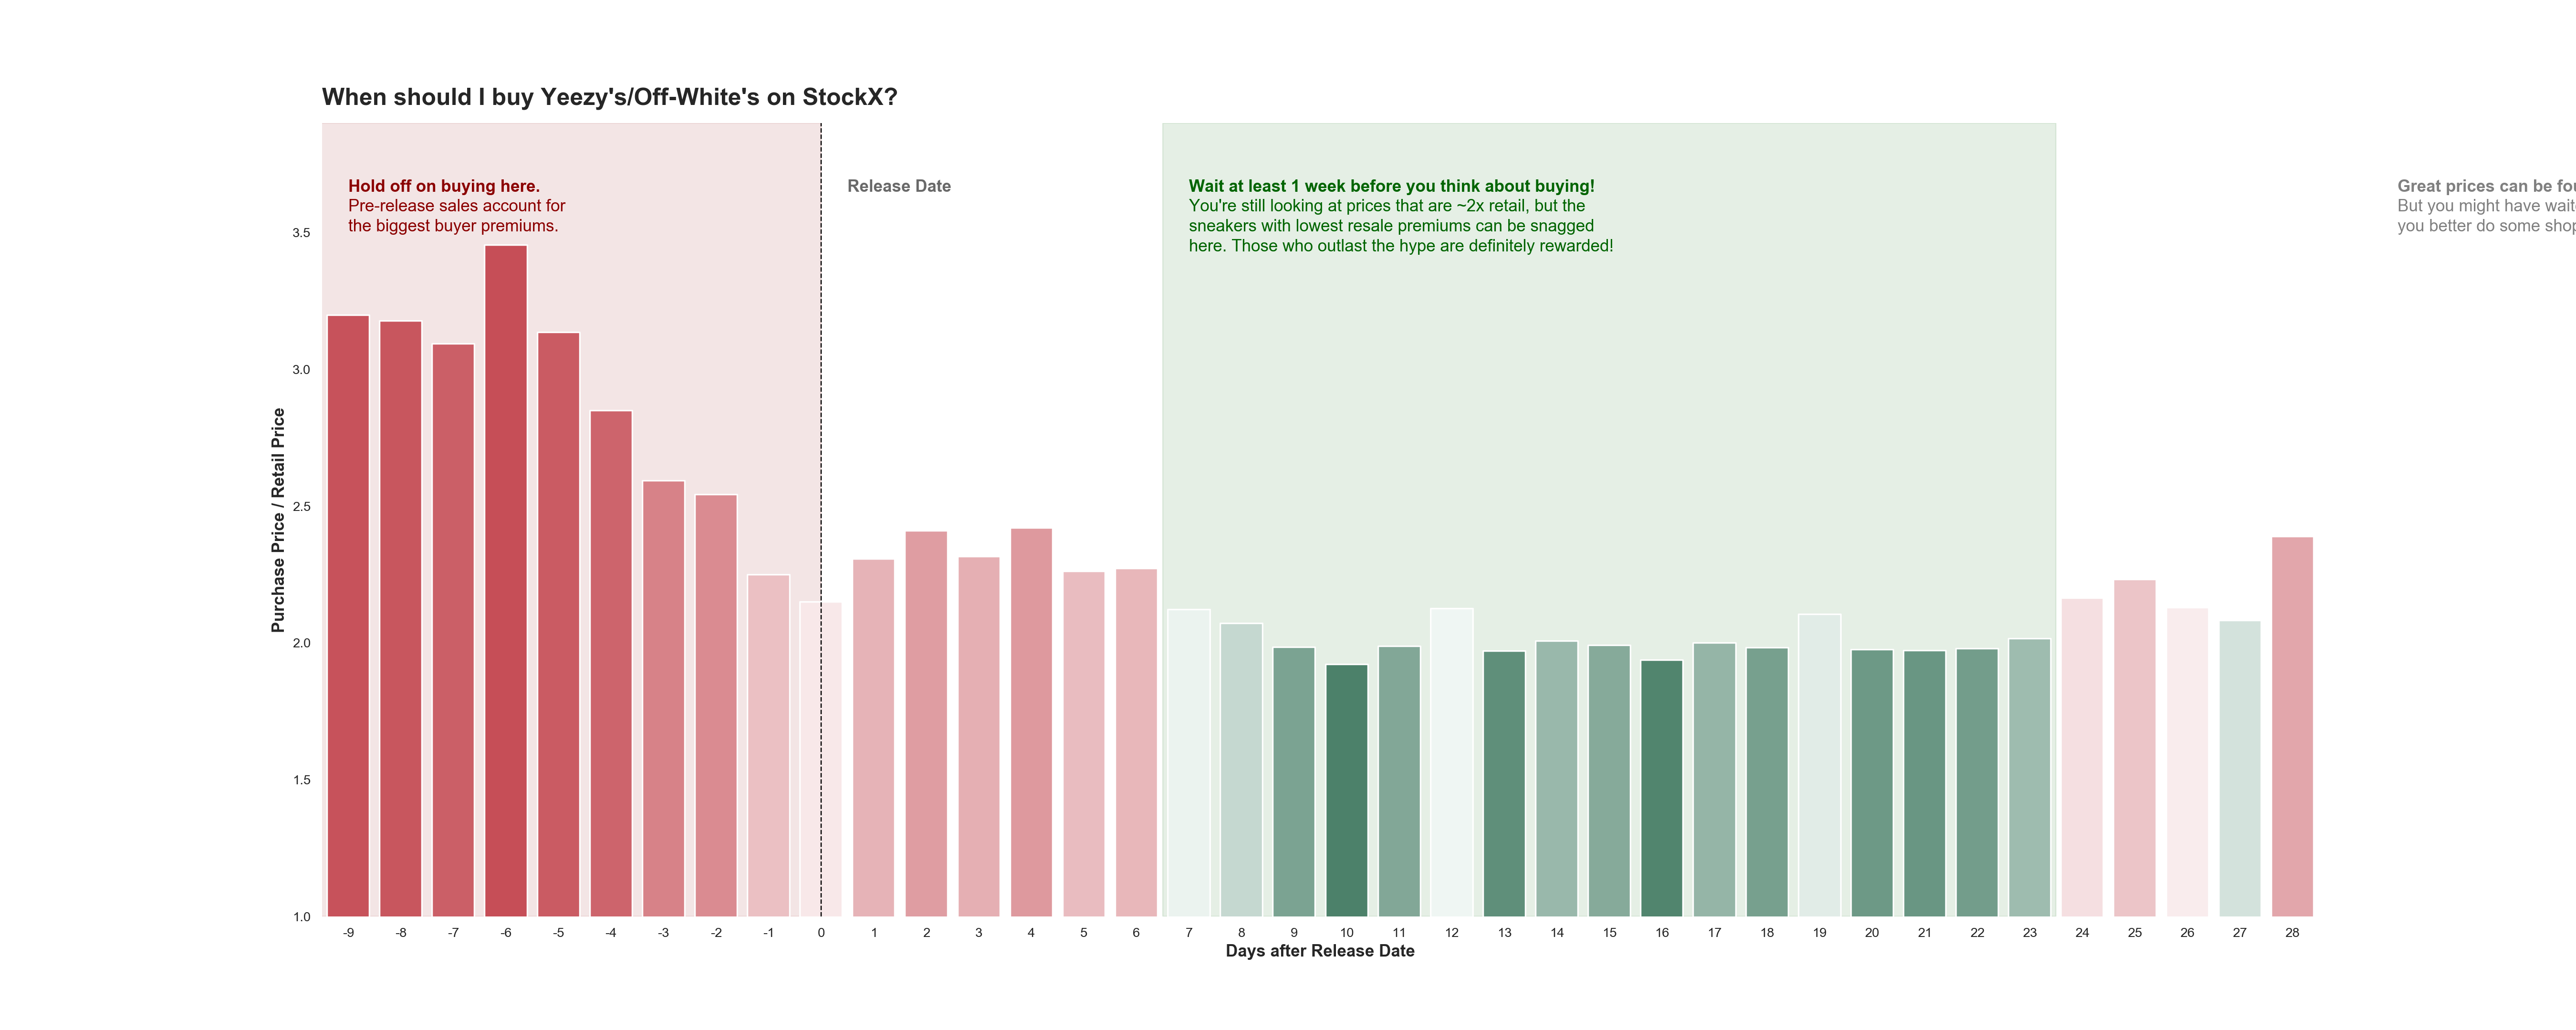

In [41]:
%matplotlib notebook
sns.set(style="whitegrid", color_codes=True)

data = df_2

pal = sns.diverging_palette(10, 150, n=len(data)) # Palette / Colormap creation (10 is green, 150 is red)
data['rank'] = data['p_of_retail'].argsort().argsort() # Ranks vals and assigns colors 

fig, ax = plt.subplots(figsize=(30,12))

plt.margins(x=0.01)
_ = ax.set_ylim([1.0, 3.9])

height = 3.65
space = .073

# Pre-release 
ax.axvspan(-1,9,color='DarkRed',alpha=.1) # Worst time to buy 
ax.text(0, height,'Hold off on buying here.',fontsize='14',color='Darkred',fontweight='bold')
# ax.text(-0.5, height-space,'here.',fontsize='14',color='Darkred',fontweight='bold')
ax.text(0, height-space,"""Pre-release sales account for""",fontsize='14',color='Darkred')
ax.text(0, height-space*2,"""the biggest buyer premiums.""",fontsize='14',color='Darkred')

# Release Date
ax.axvline(9,color='Black',linestyle='--') # Release Date 
ax.text(9.5, height,'Release Date',fontsize='14', color='DimGray',fontweight='bold')

# Good time to buy
ax.axvspan(15.5,32.5,color='DarkGreen',alpha=.1) # Best time to buy 
ax.text(16, height,'Wait at least 1 week before you think about buying!',fontsize='14',color='DarkGreen',fontweight='bold')
ax.text(16, height-space,"""You're still looking at prices that are ~2x retail, but the""",fontsize='14',color='DarkGreen')
ax.text(16, height-space*2,"""sneakers with lowest resale premiums can be snagged""",fontsize='14',color='DarkGreen')
ax.text(16, height-space*3,'here. Those who outlast the hype are definitely rewarded!',fontsize='14',color='DarkGreen')
# ax.text(16.1, height-space*4,'',fontsize='14',color='DarkGreen')

# Even better time to buy - but you might've waited too long! 
ax.axvspan(38.5,57.5,color='SlateGrey',alpha=.2) 
ax.text(39, height,'Great prices can be found here as well.',fontsize='14',color='Grey',fontweight='bold')
ax.text(39, height-space,"""But you might have waited too long! These sneakers go fast, so """,fontsize='14',color='Grey')
ax.text(39, height-space*2,"""you better do some shopping between weeks 2-4.""",fontsize='14',color='Grey')

# Late-Stage - Supply is likely limited, and sneakers are now going for a premium! 
ax.axvspan(67.5,76,color='DarkRed',alpha=.1) # Worst time to buy 
ax.text(68, height,'Prices spike back up, ',fontsize='14',color='Darkred',fontweight='bold')
ax.text(68, height-space,'most likely due to ',fontsize='14',color='Darkred',fontweight='bold')
ax.text(68, height-space*2,"""limited supply remaining """,fontsize='14',color='Darkred')
ax.text(68, height-space*3,"""in the marketplace.""",fontsize='14',color='Darkred')

ax.set_ylabel('Purchase Price / Retail Price', fontsize=14,fontweight='bold')
ax.set_xlabel('Days after Release Date', fontsize=14,fontweight='bold')
ax.set_title("""When should I buy Yeezy's/Off-White's on StockX? """,fontsize=20,loc='left',fontweight='bold',pad=15)

ax.grid(False)
plt.box(False)


# Animations 
def animate(i):
    data = df_2.iloc[:int(i+1)] #select data range
    p = sns.barplot(x=data['days_after_release'], y=data['p_of_retail'], palette=np.array(pal[::-1])[rank], ax=ax)
    plt.setp(p.lines,linewidth=1)
    ax.set_ylabel('Purchase Price / Retail Price', fontsize=14,fontweight='bold')
    ax.set_xlabel('Days after Release Date', fontsize=14,fontweight='bold')


# To start the animation use matplotlib.animation.FuncAnimation in which you link the animation function and define how many frames your animation should contain. frames therefore defines how often animate(i) is being called.
ani = mpl.animation.FuncAnimation(fig, animate, frames=len(df_2), repeat=True)

ani.save('my_animation.mp4',writer=writer)

## Link to the resulting animation!

[HERE!](https://www.youtube.com/watch?v=nDVz9fdRfzU&feature=youtu.be)

<br>